In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import joblib
import sys

sys.path.append('../../src/')
warnings.filterwarnings("ignore")

# Jams

## Univariate Analysis

### Numerical Feature Analysis

In [3]:
df1 = pd.read_csv('D:\document\data_science\DLSL Study case\mini_project_DS\data\inter\dt_jams.csv')

In [57]:
df1.sample()

,street,level,median_length,median_delay,median_speed_kmh,total_records,median_level,is_weekend,hours,jams_weekend,jams_weekday,jams_morning,jams_night,jams_midnight
518,Ir Haji Juanda,4,828.5,374.0,6.83,24,4.0,0,13,0.0,1.0,1.0,0.0,0.0


In [5]:
df1['hours'] = df1['hours'].astype(np.object)
df1['level'] = df1['level'].astype(np.object)
df1 = df1.drop(['time'],axis=1)

In [14]:
# Grouping Features Based on Their Data Type

num = df1.select_dtypes(include=[np.number], exclude=[np.bool]).columns
cat = df1.select_dtypes(exclude=[np.number]).columns

In [15]:
num

Index(['median_length', 'median_delay', 'median_speed_kmh', 'total_records',
       'median_level', 'is_weekend', 'jams_weekend', 'jams_weekday',
       'jams_morning', 'jams_night', 'jams_midnight'],
      dtype='object')

In [47]:
num = list(set(num)-set(['is_weekend','jams_weekend','jams_weekday','jams_morning','jams_night','jams_midnight','street','level']))
num.sort() ## --> remember to sort

In [49]:
cat = list(set(df1.columns)-set(num))
cat.sort() ## --> remember to sort

In [50]:
num

['hours',
 'median_delay',
 'median_length',
 'median_level',
 'median_speed_kmh',
 'total_records']

In [51]:
cat

['is_weekend',
 'jams_midnight',
 'jams_morning',
 'jams_night',
 'jams_weekday',
 'jams_weekend',
 'level',
 'street']

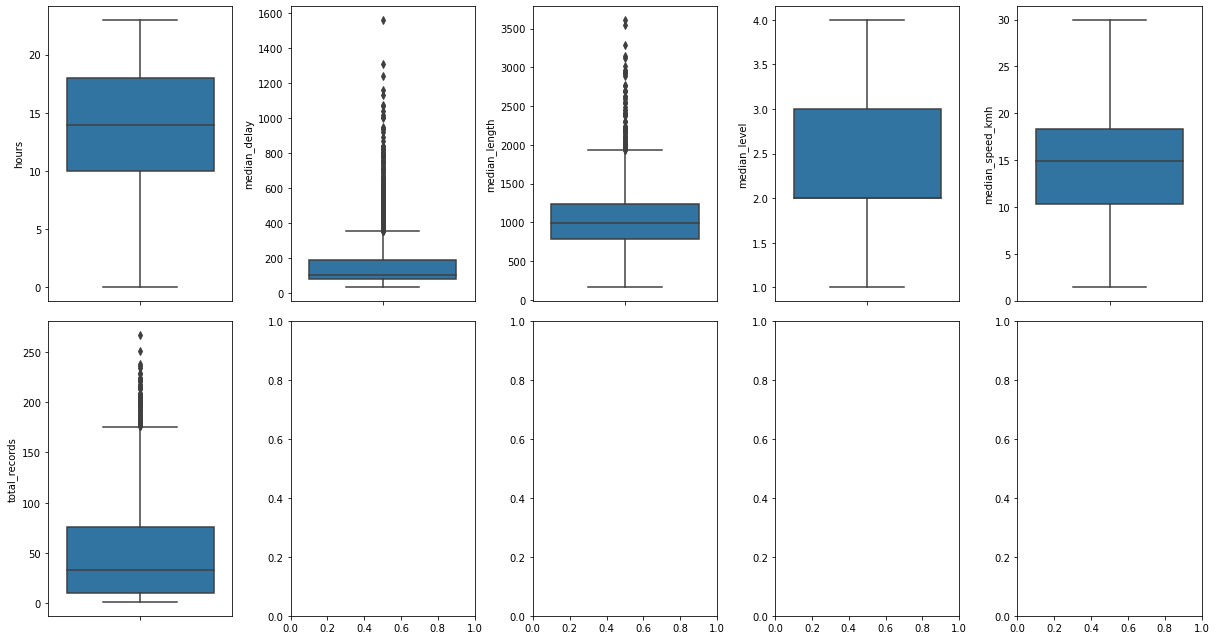

In [52]:
# Create Boxplot for Each Numerical Feature

fig, axes = plt.subplots(2, 5, figsize=(17,9))
xy = [(0,0), (0,1), (0,2), (0,3), (0,4), (1,0), (1,1), (1,2), (1,3), (1,4)]

for i in range(len(num)):
  sns.boxplot(y=df1[num[i]], ax=axes[xy[i]])
  plt.tight_layout()

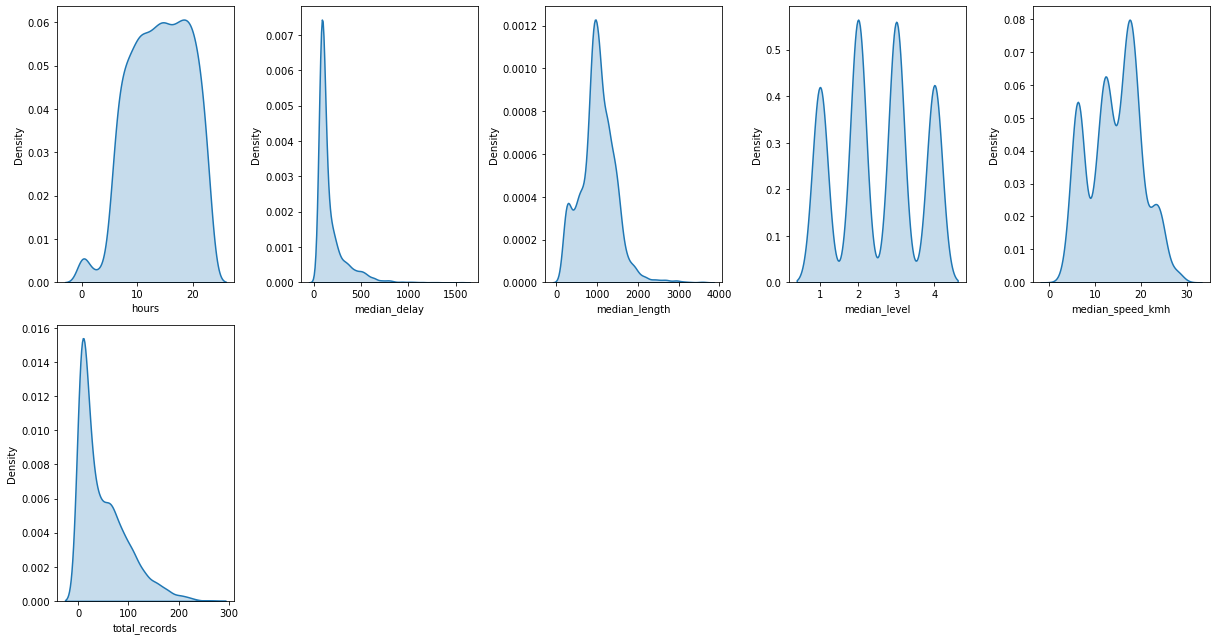

In [53]:
# Create Distplot for Each Numerical Feature

plt.figure(figsize=(17,9))
for i in range(0, len(num)):
    plt.subplot(2, 5, i+1)
    sns.kdeplot(x=df1[num[i]], linewidth=1.5, shade=True)
    plt.xlabel(num[i])
    plt.tight_layout()

## Categorical Features Analysis

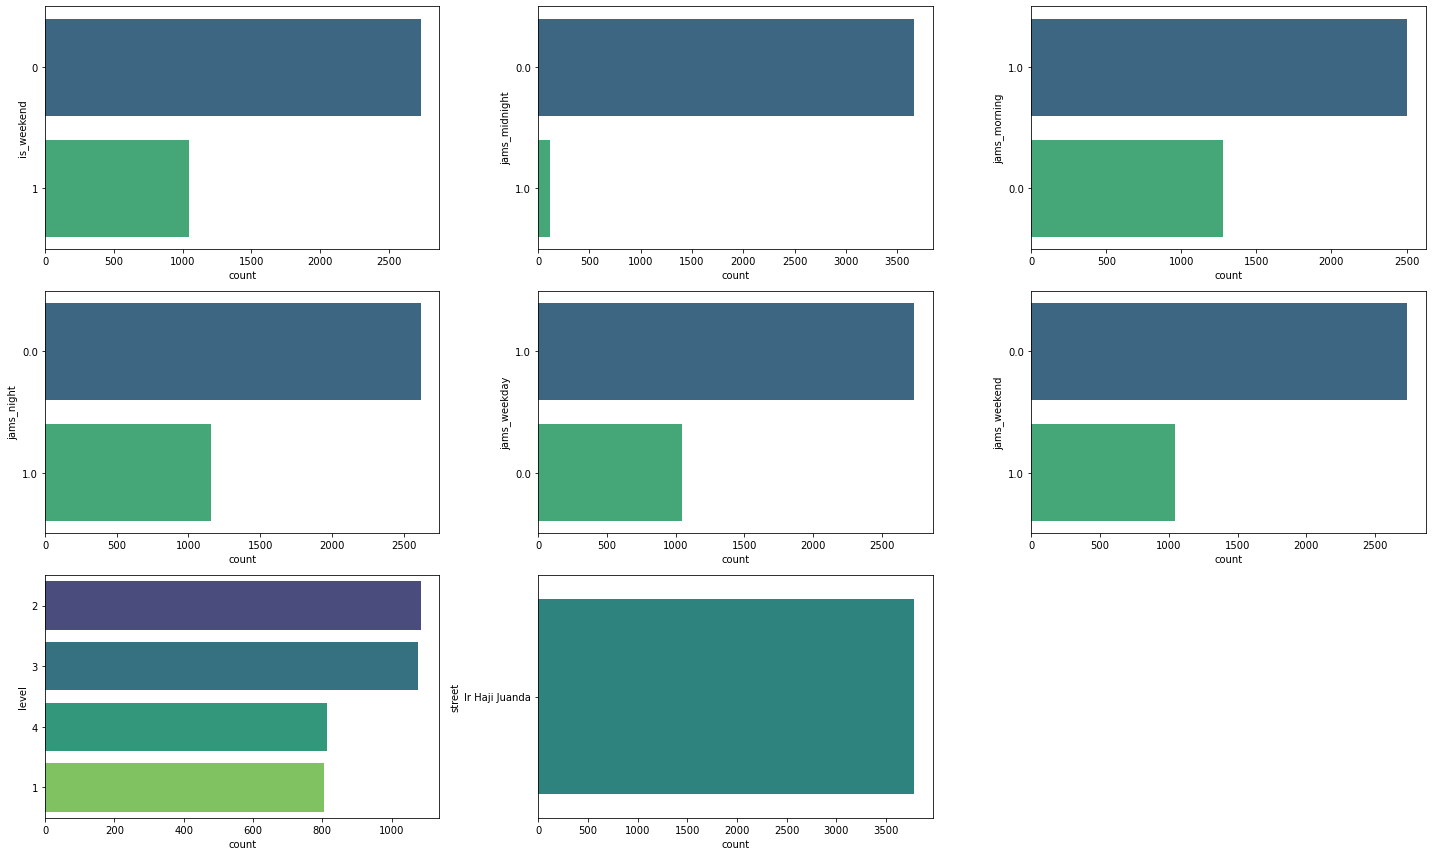

In [56]:
# Create Countplot for Each Categorical Feature

fig, axes = plt.subplots(3, 3, figsize=(20,12))
xy = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1)]

for i in range(len(cat)):
  if i == 0:
    sns.countplot(y=df1[cat[i]], palette='viridis',ax=axes[xy[i]])
  else:
    sns.countplot(y=df1[cat[i]], palette='viridis', order= df1[cat[i]].value_counts().index, ax=axes[xy[i]])
axes[2, 2].axis('off')
plt.tight_layout()

### Bivariate Analysis

#### Numerical Feature Analysis

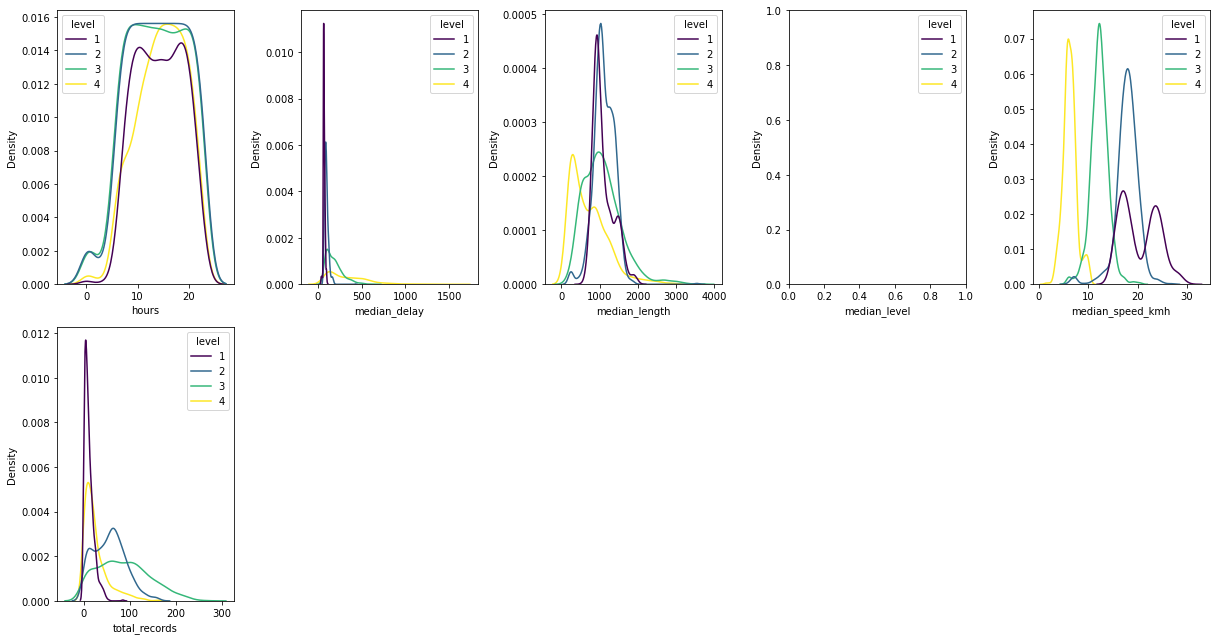

In [58]:
# Create Distplot per Purchase for Each Numerical Feature

plt.figure(figsize=(17,9))
for i in range(0, len(num)):
    plt.subplot(2, 5, i+1)
    sns.kdeplot(x=df1[num[i]], hue=df1['level'],palette='viridis', linewidth=1.5)
    plt.xlabel(num[i])
    plt.tight_layout()

#### Categorical Feature Analysis

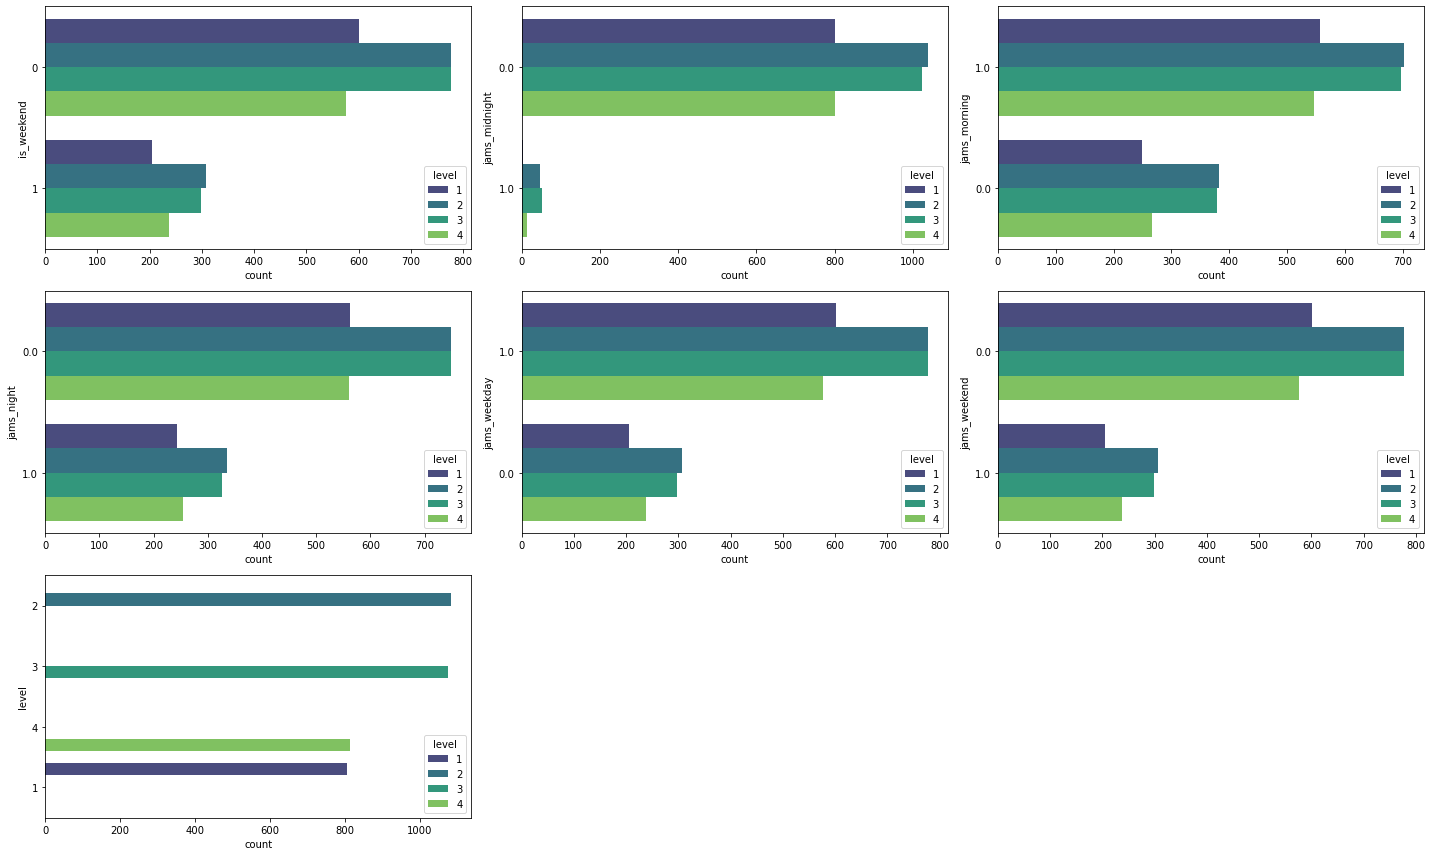

In [59]:
# Create Countplot per Purchase for Each Categorical Feature

fig, axes = plt.subplots(3, 3, figsize=(20,12))
xy = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1)]

for i in range(len(cat)-1):
  if i == 0:
    sns.countplot(y=df1[cat[i]], hue=df1.level, palette='viridis', ax=axes[xy[i]])
    plt.tight_layout()
  else:
    sns.countplot(y=df1[cat[i]], hue=df1.level, palette='viridis', order= df1[cat[i]].value_counts().index, ax=axes[xy[i]])
    plt.tight_layout()
axes[2, 1].axis('off')
axes[2, 2].axis('off')
plt.tight_layout()

### MultiVariate Analysis

#### Correlation Heatmap

<AxesSubplot:>

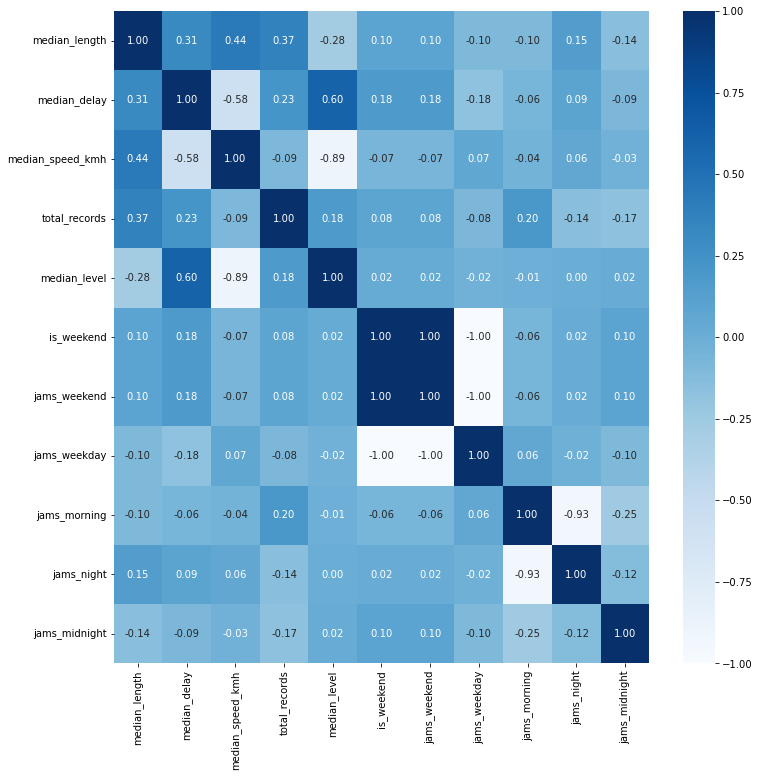

In [61]:
# Create Heatmap Correlation Chart for Each Numerical Features

plt.figure(figsize=(12, 12))
sns.heatmap(df1.corr(), cmap='Blues', annot=True, fmt='.2f')

# Alerts

## Univariate Analysis

### Numerical Feature Analysis

In [82]:
df2 = pd.read_csv('D:\document\data_science\DLSL Study case\mini_project_DS\data\inter\dt_alert.csv')

In [83]:
df2['hours'] = df2['hours'].astype(np.object)
df2 = df2.drop(['time'],axis=1)

In [84]:
# Grouping Features Based on Their Data Type

num = df2.select_dtypes(include=[np.number], exclude=[np.bool]).columns
cat = df2.select_dtypes(exclude=[np.number]).columns

In [85]:
num

Index(['total_records', 'is_weekend', 'jams_weekend', 'jams_weekday',
       'jams_morning', 'jams_night', 'jams_midnight'],
      dtype='object')

In [86]:
num = list(set(num)-set(['is_weekend','jams_weekend','jams_weekday','jams_morning','jams_night','jams_midnight','street','level']))
num.sort() ## --> remember to sort

In [87]:
cat = list(set(df2.columns)-set(num))
cat.sort() ## --> remember to sort

In [88]:
df2

,street,type,total_records,is_weekend,hours,jams_weekend,jams_weekday,jams_morning,jams_night,jams_midnight
0,Ir Haji Juanda,JAM,25,0,12,0.0,1.0,1.0,0.0,0.0
1,Ir Haji Juanda,JAM,6,0,13,0.0,1.0,1.0,0.0,0.0
2,Ir Haji Juanda,JAM,30,0,15,0.0,1.0,1.0,0.0,0.0
3,Ir Haji Juanda,JAM,46,0,16,0.0,1.0,1.0,0.0,0.0
4,Ir Haji Juanda,JAM,42,0,17,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
450,Ir Haji Juanda,JAM,5,1,3,1.0,0.0,0.0,0.0,1.0
451,Ir Haji Juanda,JAM,40,1,12,1.0,0.0,1.0,0.0,0.0
452,Ir Haji Juanda,JAM,28,1,13,1.0,0.0,1.0,0.0,0.0
453,Ir Haji Juanda,JAM,89,1,14,1.0,0.0,1.0,0.0,0.0


In [89]:
num

['total_records']

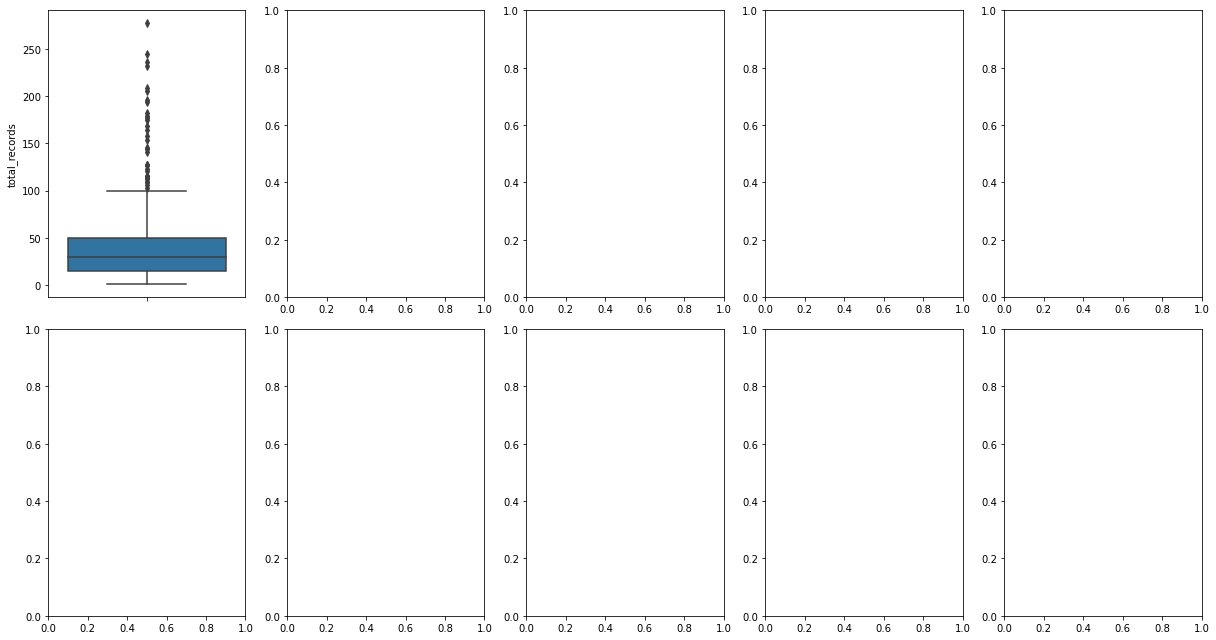

In [90]:
# Create Boxplot for Each Numerical Feature

fig, axes = plt.subplots(2, 5, figsize=(17,9))
xy = [(0,0), (0,1), (0,2), (0,3), (0,4), (1,0), (1,1), (1,2), (1,3), (1,4)]

for i in range(len(num)):
  sns.boxplot(y=df2[num[i]], ax=axes[xy[i]])
  plt.tight_layout()

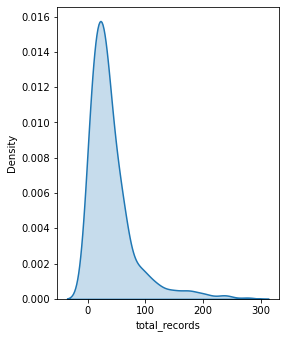

In [91]:
# Create Distplot for Each Numerical Feature

plt.figure(figsize=(17,9))
for i in range(0, len(num)):
    plt.subplot(2, 5, i+1)
    sns.kdeplot(x=df2[num[i]], linewidth=1.5, shade=True)
    plt.xlabel(num[i])
    plt.tight_layout()

## Categorical Features Analysis

IndexError: list index out of range

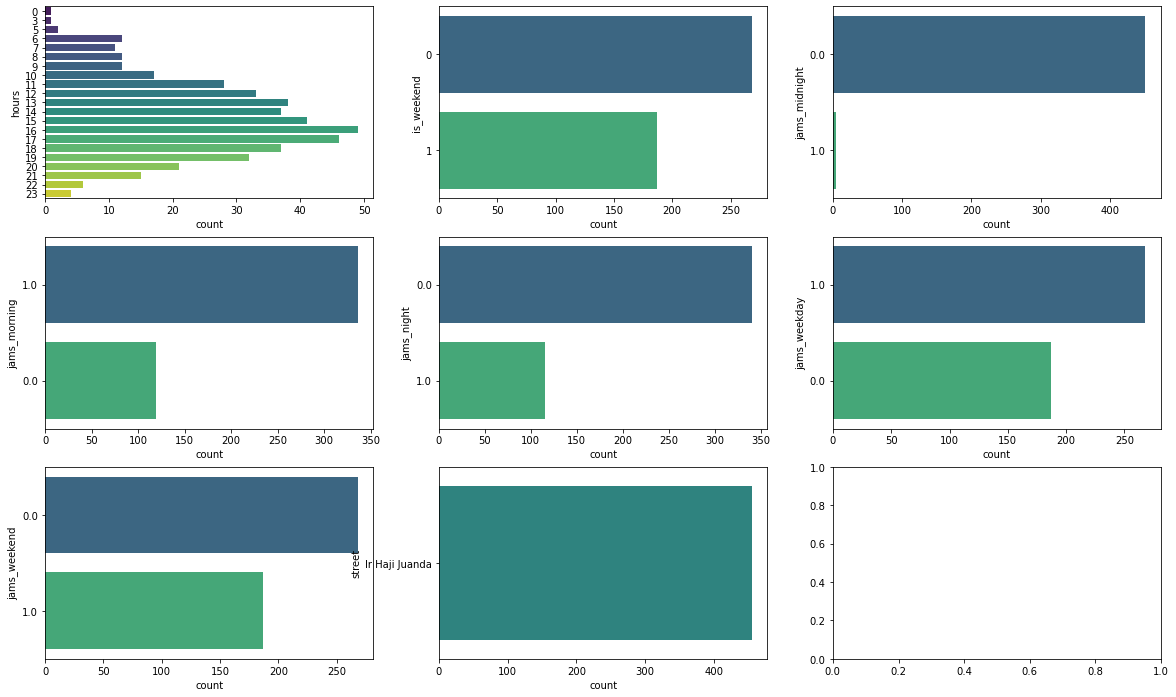

In [92]:
# Create Countplot for Each Categorical Feature

fig, axes = plt.subplots(3, 3, figsize=(20,12))
xy = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1)]

for i in range(len(cat)):
  if i == 0:
    sns.countplot(y=df2[cat[i]], palette='viridis',ax=axes[xy[i]])
  else:
    sns.countplot(y=df2[cat[i]], palette='viridis', order= df2[cat[i]].value_counts().index, ax=axes[xy[i]])
axes[2, 2].axis('off')
plt.tight_layout()

### Bivariate Analysis

#### Numerical Feature Analysis

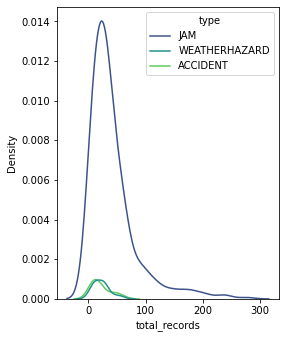

In [79]:
# Create Distplot per Purchase for Each Numerical Feature

plt.figure(figsize=(17,9))
for i in range(0, len(num)):
    plt.subplot(2, 5, i+1)
    sns.kdeplot(x=df2[num[i]], hue=df2['type'],palette='viridis', linewidth=1.5)
    plt.xlabel(num[i])
    plt.tight_layout()

#### Categorical Feature Analysis

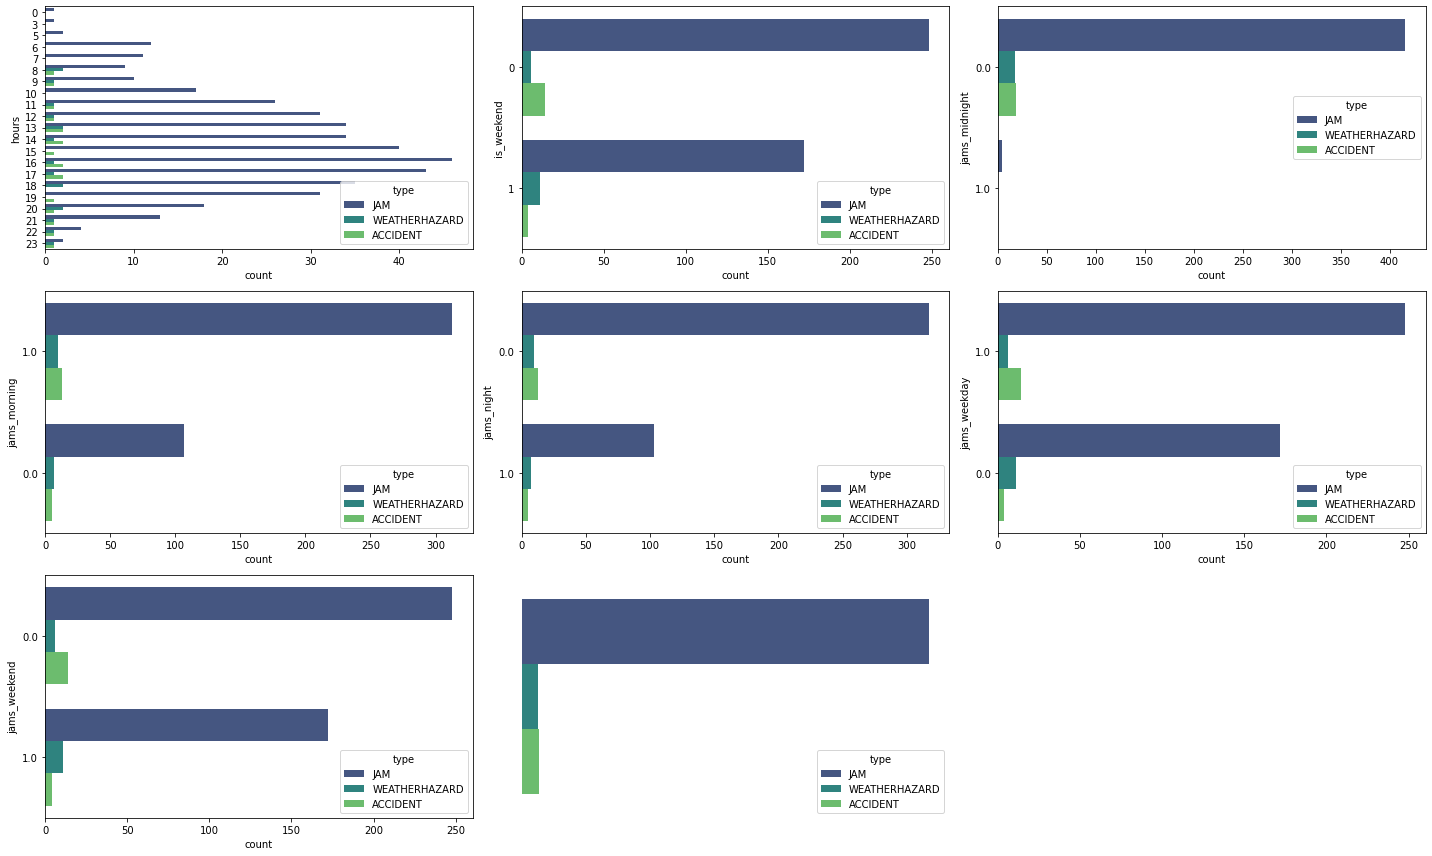

In [93]:
# Create Countplot per Purchase for Each Categorical Feature

fig, axes = plt.subplots(3, 3, figsize=(20,12))
xy = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1)]

for i in range(len(cat)-1):
  if i == 0:
    sns.countplot(y=df2[cat[i]], hue=df2.type, palette='viridis', ax=axes[xy[i]])
    plt.tight_layout()
  else:
    sns.countplot(y=df2[cat[i]], hue=df2.type, palette='viridis', order= df2[cat[i]].value_counts().index, ax=axes[xy[i]])
    plt.tight_layout()
axes[2, 1].axis('off')
axes[2, 2].axis('off')
plt.tight_layout()

### MultiVariate Analysis

#### Correlation Heatmap

<AxesSubplot:>

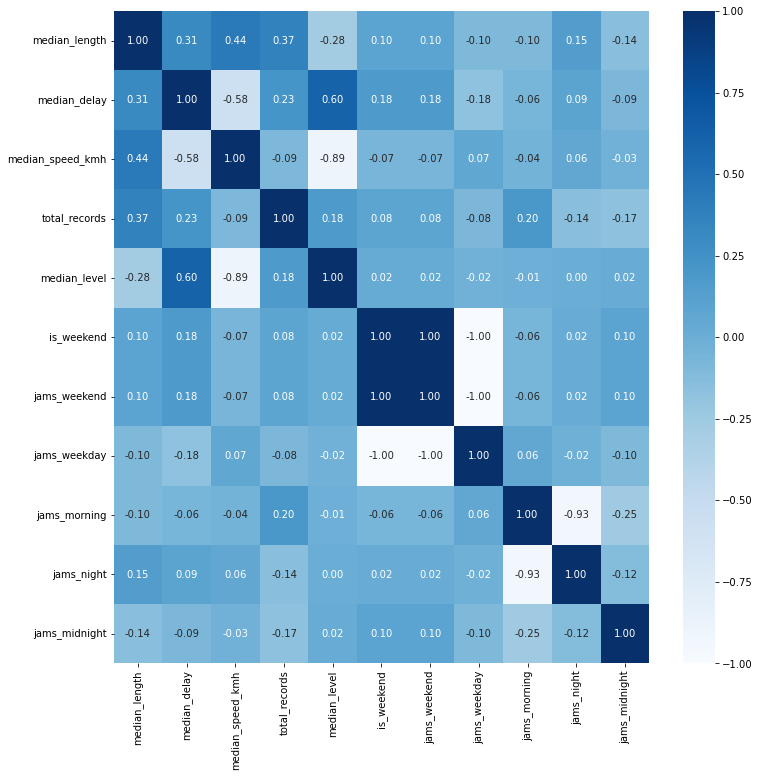

In [94]:
# Create Heatmap Correlation Chart for Each Numerical Features

plt.figure(figsize=(12, 12))
sns.heatmap(df1.corr(), cmap='Blues', annot=True, fmt='.2f')

## Irregularities

## Univariate Analysis

### Numerical Feature Analysis

In [147]:
df3 = pd.read_csv('D:\document\data_science\DLSL Study case\mini_project_DS\data\inter\dt_irregularities.csv')

In [148]:
df3.sample()

,time,street,jam_level,median_length,median_delay_seconds,median_regular_speed,total_records,median_seconds,median_speed,median_jam_level,is_weekend,hours,jams_weekend,jams_weekday,jams_morning,jams_night,jams_midnight
93,2022-07-30 19:00:00,Ir Haji Juanda,4,1875.0,1186.0,11.34,59,1454.0,5.41,4.0,1,19,1.0,0.0,0.0,1.0,0.0


In [149]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  379 non-null    object 
 1   street                379 non-null    object 
 2   jam_level             379 non-null    int64  
 3   median_length         379 non-null    float64
 4   median_delay_seconds  379 non-null    float64
 5   median_regular_speed  379 non-null    float64
 6   total_records         379 non-null    int64  
 7   median_seconds        379 non-null    float64
 8   median_speed          379 non-null    float64
 9   median_jam_level      379 non-null    float64
 10  is_weekend            379 non-null    int64  
 11  hours                 379 non-null    int64  
 12  jams_weekend          379 non-null    float64
 13  jams_weekday          379 non-null    float64
 14  jams_morning          379 non-null    float64
 15  jams_night            3

In [150]:
df3['hours'] = df3['hours'].astype(np.object)
df3['jam_level'] = df3['jam_level'].astype(np.object)
df3 = df3.drop(['time'],axis=1)

In [151]:
# Grouping Features Based on Their Data Type

num = df3.select_dtypes(include=[np.number], exclude=[np.bool]).columns
cat = df3.select_dtypes(exclude=[np.number]).columns

In [152]:
num

Index(['median_length', 'median_delay_seconds', 'median_regular_speed',
       'total_records', 'median_seconds', 'median_speed', 'median_jam_level',
       'is_weekend', 'jams_weekend', 'jams_weekday', 'jams_morning',
       'jams_night', 'jams_midnight'],
      dtype='object')

In [153]:
num = list(set(num)-set(['is_weekend','jams_weekend','jams_weekday','jams_morning','jams_night','jams_midnight','street','jam_level']))
num.sort() ## --> remember to sort

In [154]:
cat = list(set(df3.columns)-set(num))
cat.sort() ## --> remember to sort

In [155]:
num

['median_delay_seconds',
 'median_jam_level',
 'median_length',
 'median_regular_speed',
 'median_seconds',
 'median_speed',
 'total_records']

In [156]:
cat

['hours',
 'is_weekend',
 'jam_level',
 'jams_midnight',
 'jams_morning',
 'jams_night',
 'jams_weekday',
 'jams_weekend',
 'street']

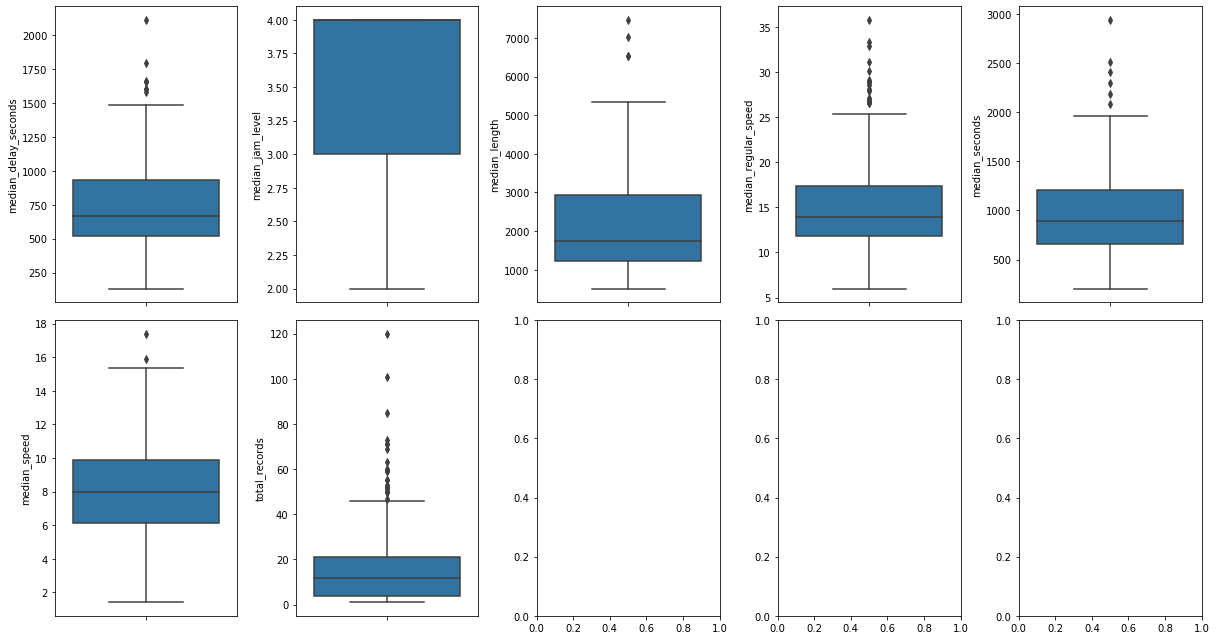

In [157]:
# Create Boxplot for Each Numerical Feature

fig, axes = plt.subplots(2, 5, figsize=(17,9))
xy = [(0,0), (0,1), (0,2), (0,3), (0,4), (1,0), (1,1), (1,2), (1,3), (1,4)]

for i in range(len(num)):
  sns.boxplot(y=df3[num[i]], ax=axes[xy[i]])
  plt.tight_layout()

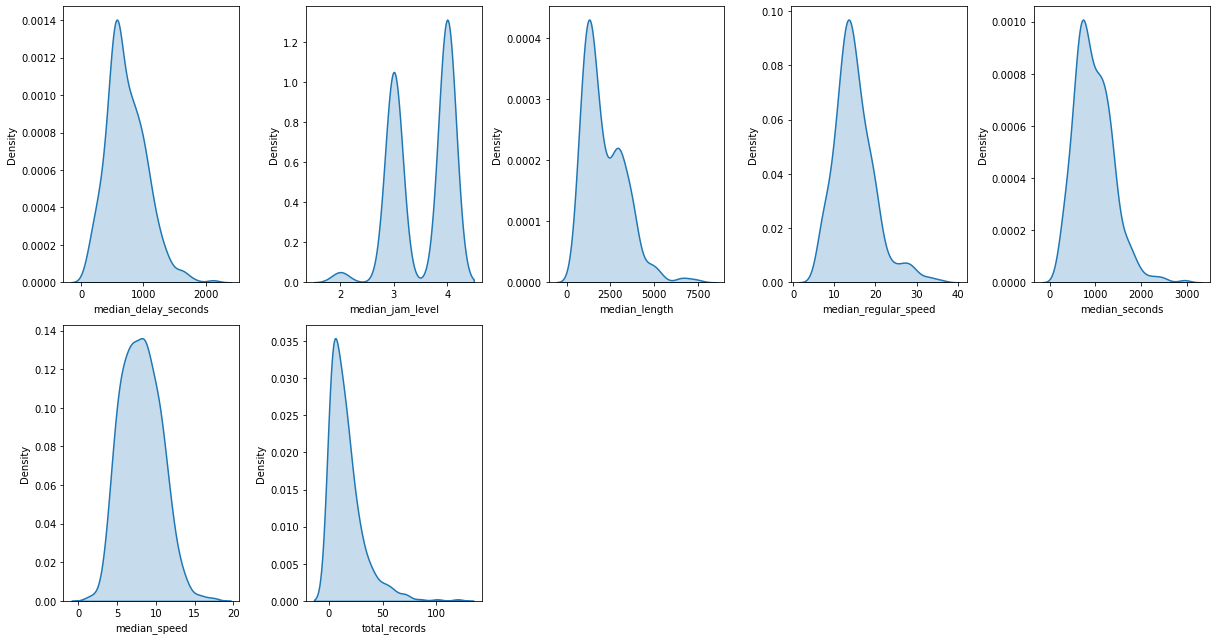

In [158]:
# Create Distplot for Each Numerical Feature

plt.figure(figsize=(17,9))
for i in range(0, len(num)):
    plt.subplot(2, 5, i+1)
    sns.kdeplot(x=df3[num[i]], linewidth=1.5, shade=True)
    plt.xlabel(num[i])
    plt.tight_layout()

## Categorical Features Analysis

IndexError: list index out of range

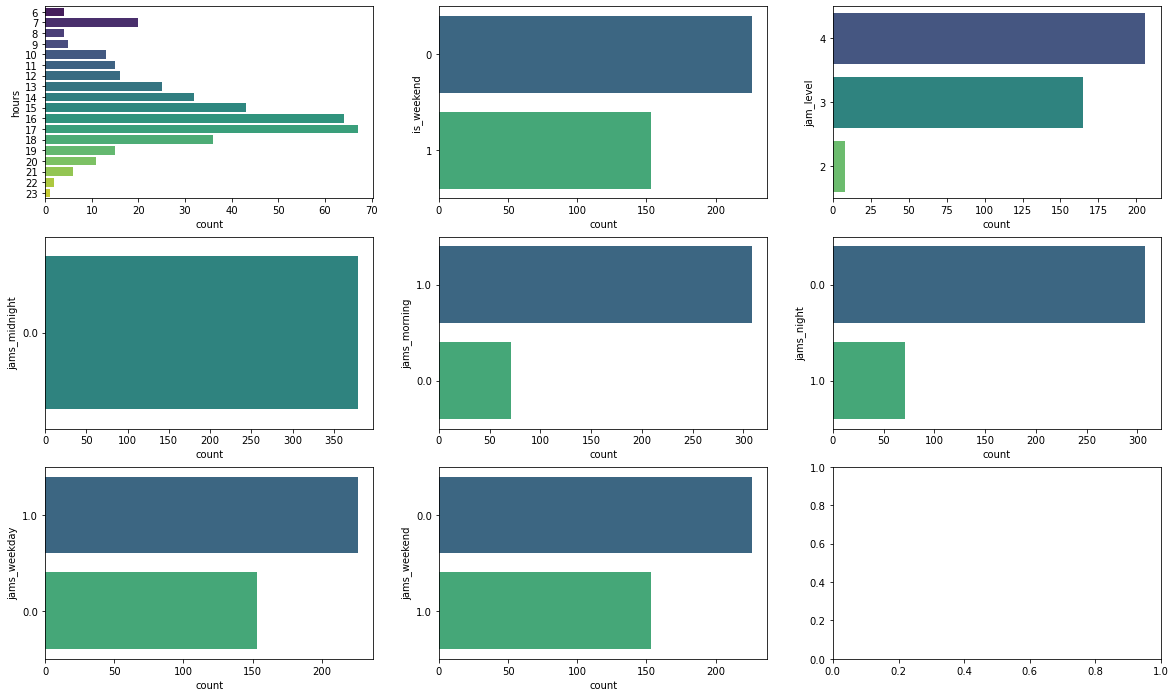

In [159]:
# Create Countplot for Each Categorical Feature

fig, axes = plt.subplots(3, 3, figsize=(20,12))
xy = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1)]

for i in range(len(cat)):
  if i == 0:
    sns.countplot(y=df3[cat[i]], palette='viridis',ax=axes[xy[i]])
  else:
    sns.countplot(y=df3[cat[i]], palette='viridis', order= df3[cat[i]].value_counts().index, ax=axes[xy[i]])
axes[2, 2].axis('off')
plt.tight_layout()

### Bivariate Analysis

#### Numerical Feature Analysis

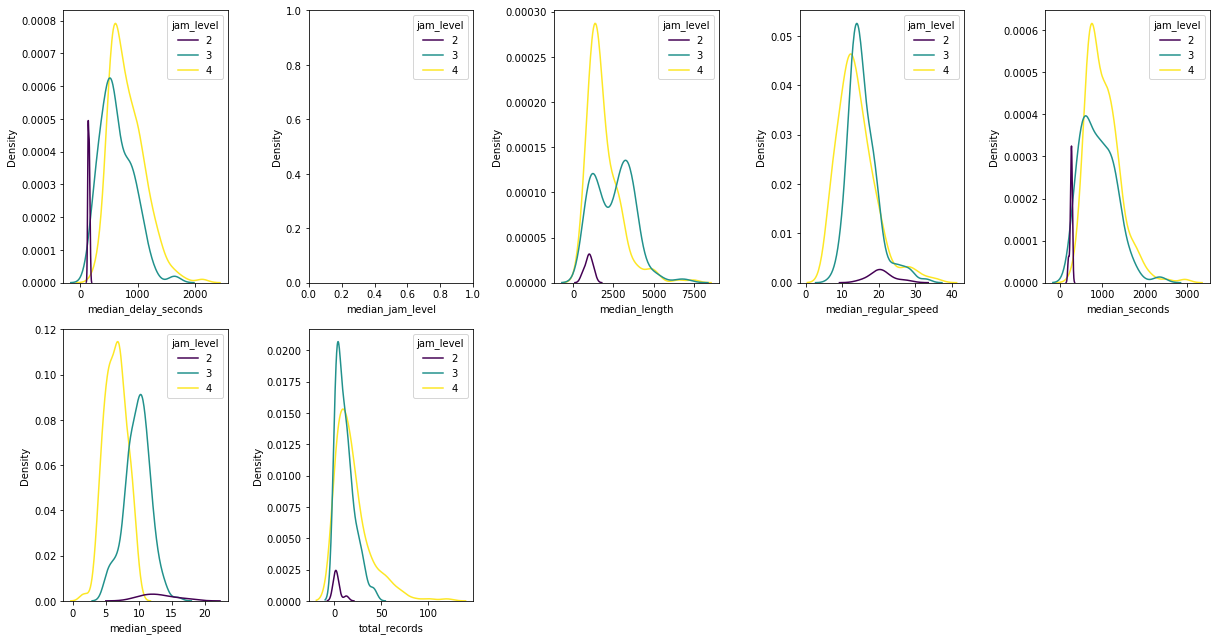

In [161]:
# Create Distplot per Purchase for Each Numerical Feature

plt.figure(figsize=(17,9))
for i in range(0, len(num)):
    plt.subplot(2, 5, i+1)
    sns.kdeplot(x=df3[num[i]], hue=df3['jam_level'],palette='viridis', linewidth=1.5)
    plt.xlabel(num[i])
    plt.tight_layout()

#### Categorical Feature Analysis

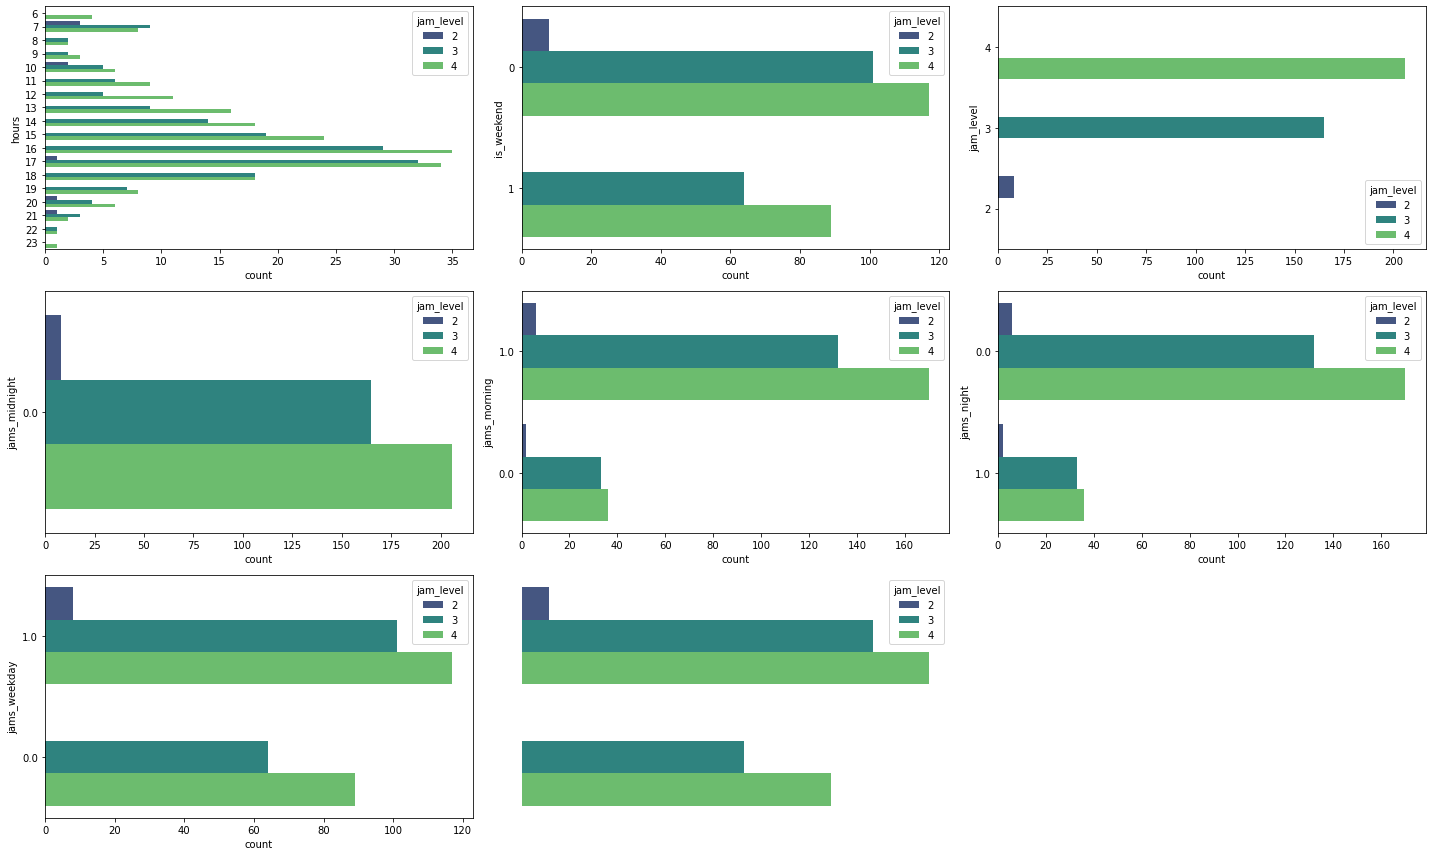

In [163]:
# Create Countplot per Purchase for Each Categorical Feature

fig, axes = plt.subplots(3, 3, figsize=(20,12))
xy = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1)]

for i in range(len(cat)-1):
  if i == 0:
    sns.countplot(y=df3[cat[i]], hue=df3.jam_level, palette='viridis', ax=axes[xy[i]])
    plt.tight_layout()
  else:
    sns.countplot(y=df3[cat[i]], hue=df3.jam_level, palette='viridis', order= df3[cat[i]].value_counts().index, ax=axes[xy[i]])
    plt.tight_layout()
axes[2, 1].axis('off')
axes[2, 2].axis('off')
plt.tight_layout()

### MultiVariate Analysis

#### Correlation Heatmap

<AxesSubplot:>

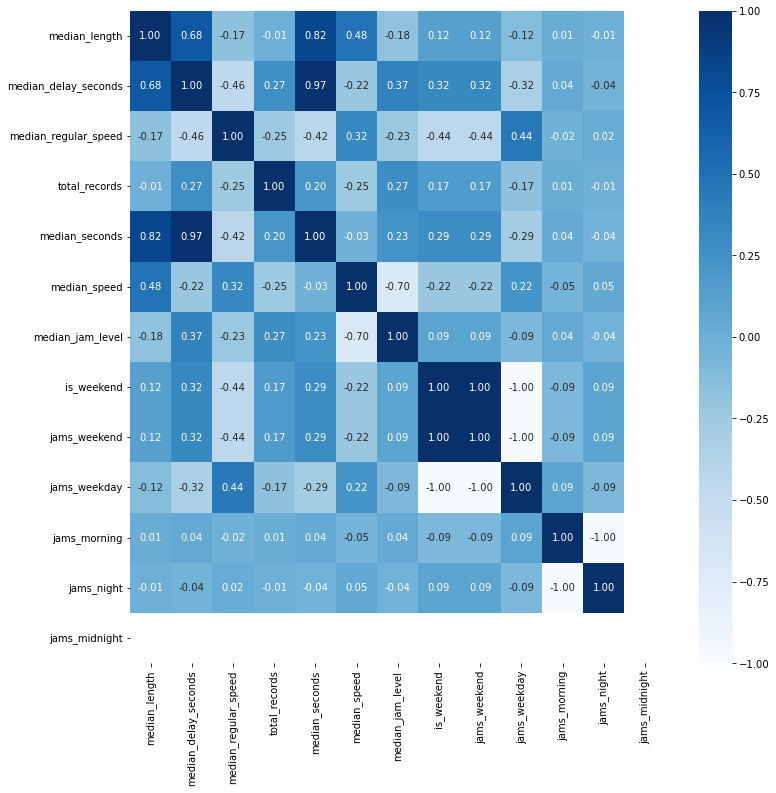

In [164]:
# Create Heatmap Correlation Chart for Each Numerical Features

plt.figure(figsize=(12, 12))
sns.heatmap(df3.corr(), cmap='Blues', annot=True, fmt='.2f')